# Regression, Runges function

## Imports

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Vår egen kode ---
from neural_network import NeuralNetwork
from optimizers import SGD, RMSprop, Adam
from losses import mse, mse_deriv
from activations import sigmoid, sigmoid_deriv, linear, linear_deriv, relu, relu_deriv

## Set seed

In [2]:
seed = 6114
np.random.seed(seed)
random.seed(seed)

## Defining the Runge function

In [3]:
def f(x):
    return 1/(1 + 25 * x**2)

## Generate dataset

In [4]:
N = 500   
x = np.linspace(-1, 1, N).reshape(-1, 1)
y = f(x)

## Train/test split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=seed
)

## Scaling

In [6]:
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

## Building the neural network

In [7]:
layer_output_sizes=[50, 1]
activation_funcs=[relu, linear]
activation_grads=[relu_deriv, linear_deriv]
nn = NeuralNetwork(network_input_size=1,
                   layer_output_sizes=layer_output_sizes,
                   activation_funcs=activation_funcs,
                   activation_ders=activation_grads,
                   cost_fun=mse,
                   cost_der=mse_deriv)

## Training

In [12]:
optimizer = Adam(lr=1e-3)
history = nn.fit(x_train, 
                 y_train, 
                 epochs=1000, 
                 batch_size=64, 
                 optimizer=optimizer, 
                 X_val = x_test,
                 Y_val = y_test,
                 log_every=100)


Epoch 100 | train: 0.000273 | val: 0.000268
Epoch 200 | train: 0.000057 | val: 0.000064
Epoch 300 | train: 0.000028 | val: 0.000033
Epoch 400 | train: 0.000011 | val: 0.000015
Epoch 500 | train: 0.000013 | val: 0.000013
Epoch 600 | train: 0.000016 | val: 0.000016
Epoch 700 | train: 0.000015 | val: 0.000014
Epoch 800 | train: 0.000008 | val: 0.000009
Epoch 900 | train: 0.000007 | val: 0.000009
Epoch 1000 | train: 0.000008 | val: 0.000009


## Plotting

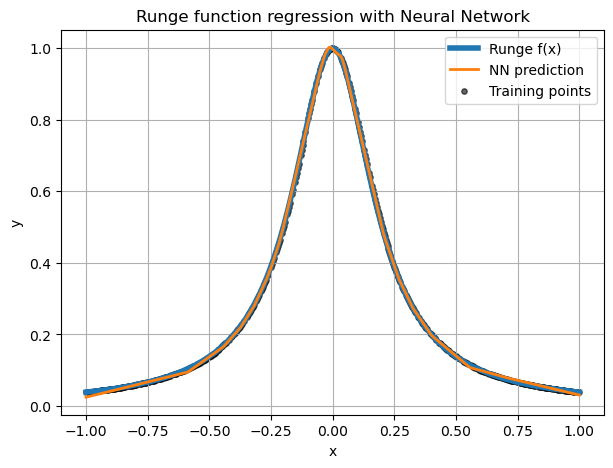

In [9]:

x_plot = np.linspace(-1, 1, 400).reshape(-1, 1)
y_true = f(x_plot)     
x_plot_scaled = scaler_x.transform(x_plot)
y_pred = nn.predict(x_plot_scaled)

x_train_unscaled = scaler_x.inverse_transform(x_train)

# --- 2) Plot sammenligning ---
plt.figure(figsize=(7, 5))
plt.plot(x_plot, y_true, label="Runge f(x)", linewidth=4)
plt.plot(x_plot, y_pred, label="NN prediction", linewidth=2)
plt.scatter(x_train_unscaled, y_train, color="black", s=15, alpha=0.6, label="Training points")
plt.title("Runge function regression with Neural Network")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## Overfitting?

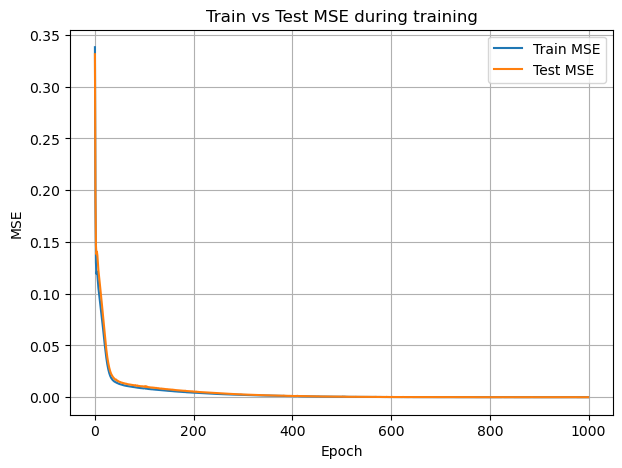

2.0537991715590043e-05


In [10]:
plt.figure(figsize=(7,5))
plt.plot(history["train_loss"], label="Train MSE")
plt.plot(history["val_loss"], label="Test MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Train vs Test MSE during training")
plt.legend()
plt.grid(True)
plt.show()

print(history["val_loss"][-1])


## Sammenlikner med Scikit-learn

Train MSE: 1.00448e-05 | Test MSE: 1.36834e-05


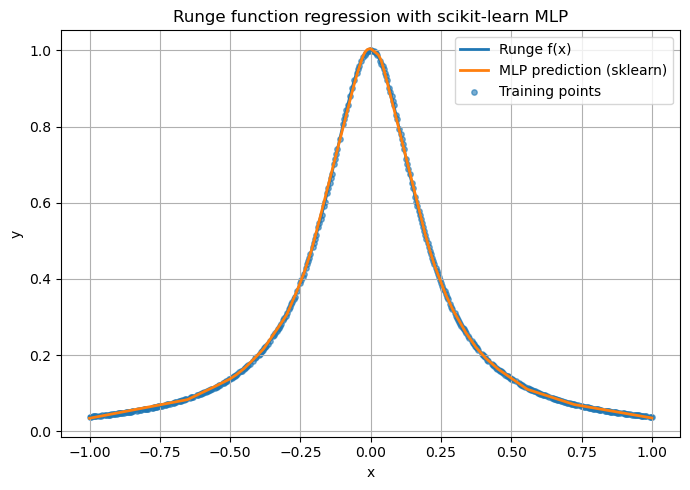

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# --- 1) Data ---
seed = 6114
rng = np.random.default_rng(seed)

def runge(x):
    return 1.0 / (1.0 + 25.0 * x**2)

N = 500
x = np.linspace(-1, 1, N).reshape(-1, 1)
y = runge(x)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=seed
)

# --- 2) Modell (skalerer X internt) ---
# Bruk 'logistic' (sigmoid) for å matche ditt oppsett; prøv tanh/relu for variasjon.
model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(50, 50),
        activation="relu",        # 'tanh' eller 'relu' er ofte enklere å trene
        solver="adam",
        learning_rate_init=1e-3,
        batch_size=64,
        max_iter=5000,
        early_stopping=True,          # bruker intern val-split
        n_iter_no_change=50,
        random_state=seed,
        verbose=False
    ))
])

model.fit(x_train, y_train.ravel())

# --- 3) Eval ---
y_train_pred = model.predict(x_train).reshape(-1, 1)
y_test_pred  = model.predict(x_test).reshape(-1, 1)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test,  y_test_pred)
print(f"Train MSE: {train_mse:.6g} | Test MSE: {test_mse:.6g}")

# --- 4) Plot (i originalt x-rom) ---
x_plot = np.linspace(-1, 1, 400).reshape(-1, 1)
y_true = runge(x_plot)
y_pred = model.predict(x_plot).reshape(-1, 1)

plt.figure(figsize=(7,5))
plt.plot(x_plot, y_true, label="Runge f(x)", linewidth=2)
plt.plot(x_plot, y_pred, label="MLP prediction (sklearn)", linewidth=2)
plt.scatter(x_train, y_train, s=15, alpha=0.6, label="Training points")
plt.title("Runge function regression with scikit-learn MLP")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()
